## 2106413 Nadhief Athallah Isya Ilmu Komputer C2 2021

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
import joblib
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### karena PMI dihitung menggunakan data harapan hidup, rata-rata lama sekolah, pengeluaran per kapita maka dari itu saya mengambil data csv ketidak cukupan pangan, persen anak dengan akte lahir, persen asupan kalori di bawah 1400, persen rumah dengan fasilitas cuci tangan, persen rumah menyewa, persen unmeet need pelayanan kesehatan.

In [172]:
df1= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\ketidak_cukupan_pangan_prov.csv")
df2= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_anak_dengan_akte_lahir.csv")
df3= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_asupan_kalori_bawah_1400.csv")
df4= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_rumah_dgn_fasilitas_cuci_tangan_sabun.csv")
df5= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_rumah_menyewa.csv")
df6= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_unmet_need_pelayanan_kesehatan.csv")
df7= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\proporsi_hidup_dibawah_50_persen_median_pendapatan.csv")
df8= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\kepadatan_penduduk.csv")
df9= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_penduduk_trampil_tik.csv")
df10= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\persen_perempuan_kerja_manajerial.csv")
df11= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\proporsi_kerja_informal_nonpertanian.csv")
df12= pd.read_csv("D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\pmi.csv")

In [173]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [175]:
# proses join kolom
df_gabungan = df1
kep_penduduk = df8["kepadatan_penduduk"]
df_gabungan = df_gabungan.join(kep_penduduk)
extend1 = df2["persen_anak_dengan_akte_lahir"]
df_gabungan = df_gabungan.join(extend1)
extend3 = df3["persen_asupan_kalori_bawah_1400"]
df_gabungan = df_gabungan.join(extend3)
extend2 = df4["persen_rumah_dgn_fasilitas_cuci_tangan_sabun"]
df_gabungan = df_gabungan.join(extend2)
extend5 = df5["persen_rumah_menyewa"]
df_gabungan = df_gabungan.join(extend5)
extend6 = df6["persen_unmet_need_pelayanan_kesehatan"]
df_gabungan = df_gabungan.join(extend6)
extend7 = df7["proporsi_hidup_dibawah_50_persen_median_pendapatan"]
df_gabungan = df_gabungan.join(extend7)
extend9 = df9["persen_penduduk_trampil_tik"]
df_gabungan = df_gabungan.join(extend9)
extend10 = df10["pct_perempuan_managerial"]
df_gabungan = df_gabungan.join(extend10)
extend11 = df11["proporsi_kerja_informal_nonpertanian"]
df_gabungan = df_gabungan.join(extend11)
extend12 = df12["kategori_pmi"]
df_gabungan = df_gabungan.join(extend12)

In [176]:
# mengecek data set gabungan
df_gabungan.info()
df_gabungan.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   tahun                                               175 non-null    int64  
 1   pct_tdk_cukup_pangan                                175 non-null    float64
 2   prov                                                175 non-null    object 
 3   kepadatan_penduduk                                  175 non-null    object 
 4   persen_anak_dengan_akte_lahir                       175 non-null    float64
 5   persen_asupan_kalori_bawah_1400                     175 non-null    float64
 6   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        175 non-null    float64
 7   persen_rumah_menyewa                                175 non-null    float64
 8   persen_unmet_need_pelayanan_kesehatan               175 non-null    float64
 9  

,tahun,pct_tdk_cukup_pangan,prov,kepadatan_penduduk,persen_anak_dengan_akte_lahir,persen_asupan_kalori_bawah_1400,persen_rumah_dgn_fasilitas_cuci_tangan_sabun,persen_rumah_menyewa,persen_unmet_need_pelayanan_kesehatan,proporsi_hidup_dibawah_50_persen_median_pendapatan,persen_penduduk_trampil_tik,pct_perempuan_managerial,proporsi_kerja_informal_nonpertanian,kategori_pmi
0,2021,6.90,ACEH,92,94.52,9.61,69.31,6.86,6.83,9.98,60.21,30.60,46.29,TINGGI
1,2021,6.33,SUMATERA UTARA,205,83.02,6.06,68.22,14.13,5.96,5.87,67.41,27.29,47.53,TINGGI
2,2021,6.02,SUMATERA BARAT,133,91.38,7.19,82.09,11.37,4.31,2.47,68.00,33.22,51.56,TINGGI
3,2021,10.61,RIAU,75,84.25,10.20,74.93,11.82,5.82,2.52,70.69,31.06,44.07,TINGGI
4,2021,9.25,JAMBI,72,93.37,9.80,73.41,5.95,6.56,5.91,64.47,29.66,45.97,TINGGI


In [177]:
# mengubah tipe data proc dan tahun ke kategori
df_gabungan["prov"] = df_gabungan["prov"].astype("category")
df_gabungan["tahun"] = df_gabungan["tahun"].astype("category")


In [178]:
df_gabungan.isna().sum()
df_gabungan.head(50)

,tahun,pct_tdk_cukup_pangan,prov,kepadatan_penduduk,persen_anak_dengan_akte_lahir,persen_asupan_kalori_bawah_1400,persen_rumah_dgn_fasilitas_cuci_tangan_sabun,persen_rumah_menyewa,persen_unmet_need_pelayanan_kesehatan,proporsi_hidup_dibawah_50_persen_median_pendapatan,persen_penduduk_trampil_tik,pct_perempuan_managerial,proporsi_kerja_informal_nonpertanian,kategori_pmi
0,2021,6.90,ACEH,92,94.52,9.61,69.31,6.86,6.83,9.98,60.21,30.60,46.29,TINGGI
1,2021,6.33,SUMATERA UTARA,205,83.02,6.06,68.22,14.13,5.96,5.87,67.41,27.29,47.53,TINGGI
2,2021,6.02,SUMATERA BARAT,133,91.38,7.19,82.09,11.37,4.31,2.47,68.00,33.22,51.56,TINGGI
3,2021,10.61,RIAU,75,84.25,10.20,74.93,11.82,5.82,2.52,70.69,31.06,44.07,TINGGI
4,2021,9.25,JAMBI,72,93.37,9.80,73.41,5.95,6.56,5.91,64.47,29.66,45.97,TINGGI
5,2021,6.82,SUMATERA SELATAN,93,90.05,6.97,75.28,6.18,4.70,13.24,62.59,31.15,48.20,TINGGI
6,2021,8.64,BENGKULU,102,94.52,7.27,78.83,7.03,6.06,8.37,62.10,25.66,51.00,TINGGI
7,2021,10.25,LAMPUNG,262,93.51,9.99,80.69,3.92,7.33,12.12,65.76,25.17,56.70,TINGGI
8,2021,11.05,KEP. BANGKA BELITUNG,90,96.05,6.22,89.44,7.31,6.03,0.01,66.33,29.39,43.98,TINGGI
9,2021,7.71,KEP. RIAU,258,94.20,8.48,83.77,25.95,3.96,1.59,89.06,25.66,30.93,TINGGI


## heatmap korelasi antara persen tidak cukup pangan dengan persen akte lahir

<AxesSubplot:>

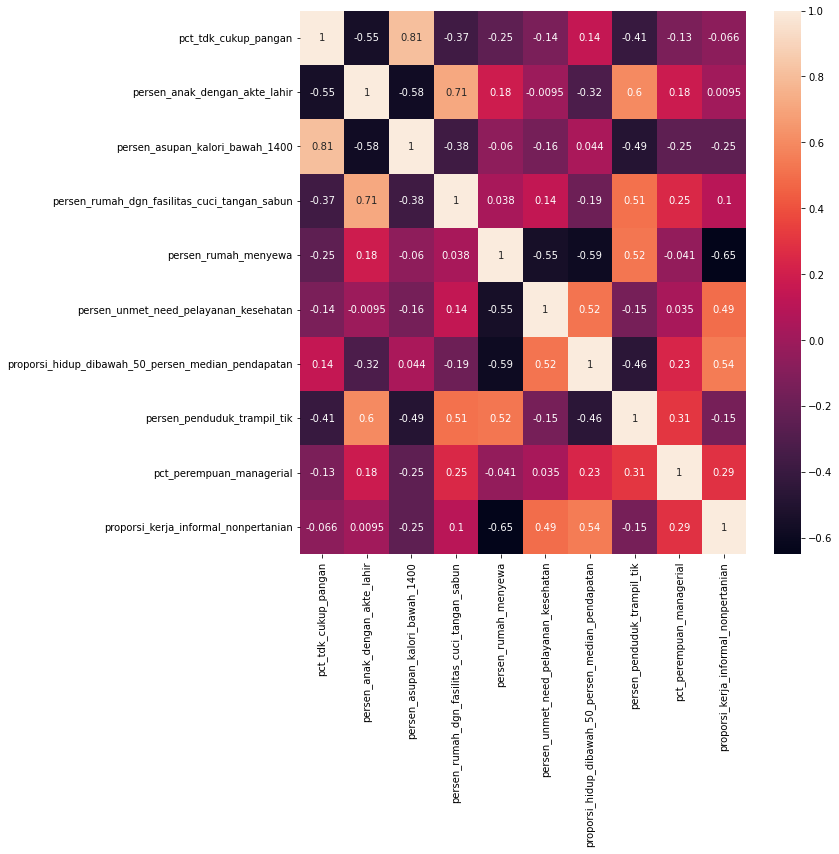

In [179]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_gabungan.corr(),annot = True, ax=ax)

#### dapat di simpulkan bahwa pct tidak cukup pangan sangat berpengaruh dengan pct asupan kalori dibawah 1400 artinya memang benar jika pct asupan kalori bawah 1400 berarti tidak cukup pangan di provinsi tersebut tinggi, begitupan dengan pct rumah menyewa berkorelasi dengan proporsi hidup dibawah 50 persen median pendapatan artinya yang pendapatannya kecil tidak memiliki rumah utuh melainkan menyewa.

In [180]:
df_oneHot = pd.get_dummies(df_gabungan, columns=['prov', 'tahun'])

In [181]:
df_oneHot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   pct_tdk_cukup_pangan                                175 non-null    float64
 1   kepadatan_penduduk                                  175 non-null    object 
 2   persen_anak_dengan_akte_lahir                       175 non-null    float64
 3   persen_asupan_kalori_bawah_1400                     175 non-null    float64
 4   persen_rumah_dgn_fasilitas_cuci_tangan_sabun        175 non-null    float64
 5   persen_rumah_menyewa                                175 non-null    float64
 6   persen_unmet_need_pelayanan_kesehatan               175 non-null    float64
 7   proporsi_hidup_dibawah_50_persen_median_pendapatan  140 non-null    float64
 8   persen_penduduk_trampil_tik                         175 non-null    float64
 9  

In [182]:
le = preprocessing.LabelEncoder()
le.fit(df_oneHot.kategori_pmi)
Y = le.transform(df_oneHot.kategori_pmi)

In [183]:
X = df_oneHot

In [184]:
# Split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [185]:
with open('D:\\ade\\SEM 3\\DATA MINING\\Uas\\dataset_uas_datamining_jan_23\\data.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

## ini saya ga paham pak kenapa clf.fit nya ga bisa sama sekali :)

In [186]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", max_depth = 20, gamma=0, subsample = 0.8,learning_rate=0.1, n_estimators = 100, nthread=4)
# num_class adalah jumlah kelas
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:kepadatan_penduduk: object, kategori_pmi: object